In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from matplotlib import animation

sns.set()


from nolitsa import data, dimension, delay, noise, lyapunov
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.filters.hp_filter import hpfilter

from sklearn.metrics import mutual_info_score
from scipy.stats import chi2_contingency

# BE

In [3]:
data_be = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Modelamietno Matematico\Chaos-Presence-SARS-CoV-II\data_bruto\COVID19BE_CASES_AGESEX.csv')#, parse_dates=['DATE'], index_col='DATE')#, na_filter=True)#.sort_index()

data_be = data_be.dropna()

In [4]:
data_be['DATE'] = pd.to_datetime(data_be['DATE'])

In [5]:
BE_cases = data_be.drop(columns=['PROVINCE', 'REGION', 'AGEGROUP', 'SEX'])

In [6]:
BE_cases

,DATE,CASES
0,2020-03-01,1
1,2020-03-01,1
2,2020-03-01,1
3,2020-03-01,1
4,2020-03-01,1
...,...,...
51962,2021-01-13,9
51963,2021-01-13,15
51964,2021-01-13,10
51965,2021-01-13,3


In [7]:
BE_cases = BE_cases.groupby('DATE')['CASES'].sum().reset_index()

In [8]:
BE_cases.index = BE_cases['DATE']

In [9]:
BE_cases = BE_cases.drop(columns=['DATE'])
BE_cases

,CASES
DATE,
2020-03-01,19
2020-03-02,19
2020-03-03,34
2020-03-04,46
2020-03-05,81
...,...
2021-01-10,785
2021-01-11,2870
2021-01-12,2135


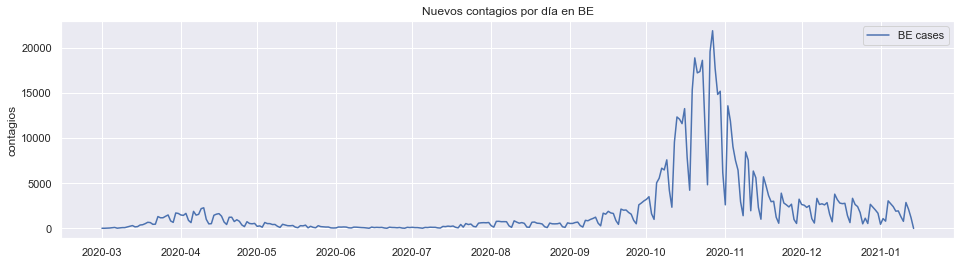

In [10]:
plt.figure(0, figsize=(16,4))
plt.plot(BE_cases, label='BE cases')
plt.title('Nuevos contagios por día en BE')
plt.ylabel('contagios')
plt.legend()
plt.show()

In [11]:
BE_cases = np.array(BE_cases)
BE_cases = BE_cases / np.max(BE_cases)

np.savetxt('BE_cases', BE_cases, delimiter=',')

In [12]:
len(BE_cases)

320

In [13]:
AMI_BE = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Modelamietno Matematico\Chaos-Presence-SARS-CoV-II\data_para_R\AMI_BE.csv')
AMI_BE.head()

,mutual_BE_cases
0,1.281448
1,0.680738
2,0.487739
3,0.487509
4,0.493506


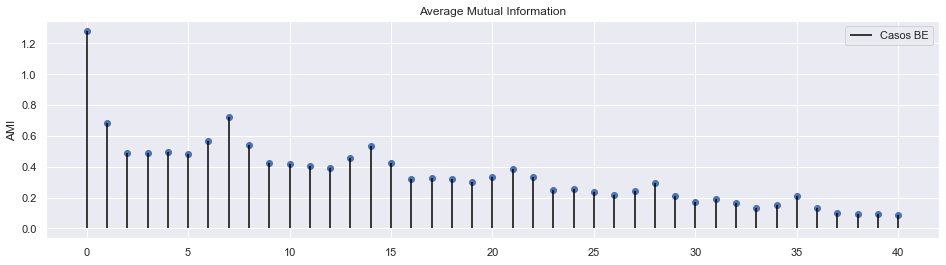

In [14]:
AMI_BE_cases = np.array(AMI_BE['mutual_BE_cases'])

plt.figure(2, figsize=(16,4))
plt.clf()

plt.vlines(np.arange(41), ymin=0, ymax=AMI_BE_cases, label='Casos BE', color='black')
plt.scatter(np.arange(41), AMI_BE_cases, marker='o')

plt.legend()
plt.title('Average Mutual Information')
plt.ylabel('AMI')
plt.show()

In [15]:
delay_BE_cases = []

for i in range(len(AMI_BE_cases)-2):
    if AMI_BE_cases[i] > AMI_BE_cases[i+1] and AMI_BE_cases[i+2] > AMI_BE_cases[i+1]:
        delay_BE_cases.append(i+1)

print('Tiempos de Retardo para BE casos:', delay_BE_cases)


Tiempos de Retardo para BE casos: [3, 5, 12, 16, 19, 23, 26, 30, 33]


- tau BE cases = 3, 5

## Obtenemos mediante graficos de separacion espacio-temporales los siguientes Theiler Windows

- tw BE cases = 13


## Para tseriesChaos obtenemos dimensión de inmersión 

- dim FNN BE cases = 2-3


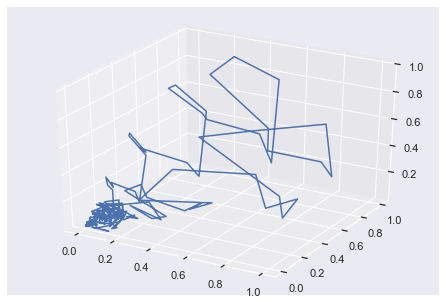

In [18]:
tau_BE_cases = 5

figg = plt.figure(6)#, figsize=(8, 7))
plt.clf()
axes = Axes3D(figg)
data_lag0 = np.array(BE_cases)[:-2].flatten()
data_lag1 = np.roll(np.array(BE_cases), -tau_BE_cases)[:-2].flatten()
data_lag2 = np.roll(np.array(BE_cases), -2 * tau_BE_cases)[:-2].flatten()
axes.plot3D(data_lag0, data_lag1, data_lag2)
figg.add_axes(axes)
plt.show()

### Calculemos el Maximo Coeficiente del Exponente de Lyapunov (MCLE) mediante $\texttt{tseriesChaos}$ de $\texttt{R}$

- series: time series.
- m: embedding dimension.
- d: time delay.
- t: Theiler window. Points separated by less than t in the series series are excluded from the search for neighbouring points. [Importante para que se tomen vecinos espaciales, y no dados por la dinámica (es decir, temporales)]
- k: number of neighbours considered.
- ref: number of points in series taken into account.
- s: iterations along which the neighbours of each point are followed.
- eps: radius of the ball inside which nearest neighbours are searched for. [Muy importante para que no se considere vecinos a distancias gigantes]

In [20]:
S_nu_BE = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Modelamietno Matematico\Chaos-Presence-SARS-CoV-II\data_para_R\S_nu_BE.csv')
S_nu_BE.head()

,S_nu_BE_cases
0,-4.286911
1,-3.553205
2,-3.539630
3,-3.390281
4,-3.360891


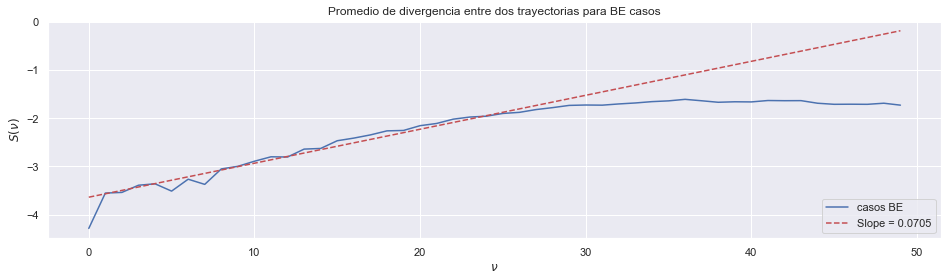

In [21]:
S_nu_BE_cases = S_nu_BE['S_nu_BE_cases']

nu = np.arange(len(S_nu_BE_cases))

MCLE_BE_cases, intercept, r_value, p_value, std_err = sp.stats.linregress(nu[3:30], S_nu_BE_cases[3:30])

plt.figure(9, figsize=(16,4))
plt.clf()
plt.plot(nu, S_nu_BE_cases, label='casos BE')
plt.plot(nu, MCLE_BE_cases*nu + intercept, linestyle='--', label='Slope = {:.4f}'.format(MCLE_BE_cases), color='r')
plt.title('Promedio de divergencia entre dos trayectorias para BE casos')
plt.ylabel('$S(\\nu)$')
plt.xlabel('$\\nu$')
plt.legend(loc=4)
plt.show()


In [23]:
data = {'': ['BE casos'], 'MCLE': 365*np.round([MCLE_BE_cases], 5),'dim inmersion':['2-3'], 'delay': [5], 'tw':[13]}
NN = pd.DataFrame(data)
NN

,,MCLE,dim inmersion,delay,tw
0,BE casos,25.7398,2-3,5,13
